In [19]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']

datastore = {}
for filename in filename_list:
    with open (filename, 'r') as f:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(float(arrtime_intensity[1]))         
            pairs = list(zip(arrtime, intensity))
        datastore[voltage] = pairs
#print(datastore)
"""
by_time = []
volts = sorted(datastore)
volts200 = [volts]*len(pairs) # 200
V200flat = [item for sublist in volts200 for item in sublist]
bytimedict = {}

for i in range(len(arrtime)):
    for key, value in datastore.items():
        valtup = value[i]
        #print(valtup)
        by_time.append(valtup[1])
        xy = list(zip(V200flat, by_time))
        #print(xy)
        bytimedict[valtup[0]] = xy
"""

from collections import defaultdict
bytimedict = defaultdict(list)
for voltage, pairs in datastore.items():
    for arrt, intens in pairs:
        bytimedict[arrt].append((voltage, intens)) 

#print(bytimedict)

In [20]:

v_for_smoothing = {}
int_for_smoothing = {}
for arrt, valuelist in bytimedict.items():
    vlist = []
    intlist = []
    for pair in valuelist:
        vlist.append(pair[0])
        intlist.append(pair[1])
        v_for_smoothing[arrt] = vlist
        int_for_smoothing[arrt] = intlist
        if len(vlist) > 7:
            vlist = []
            intlist = []
#print(int_for_smoothing)

nonzeroint_for_smoothing = {}
nonzerov_for_smoothing = {}
for arrt, ints in int_for_smoothing.items():
    volts = v_for_smoothing[arrt]
    if sum(ints) > 0.0:
        nonzeroint_for_smoothing[arrt] = ints
        nonzerov_for_smoothing[arrt] = volts
#
print(nonzeroint_for_smoothing.keys())
#print(nonzerov_for_smoothing)

dict_keys([58.672, 58.918, 59.164, 59.41, 59.656, 59.902, 60.148, 60.394, 60.64, 60.886, 61.132, 61.378, 61.624, 61.87, 62.116, 62.362, 62.608, 62.854, 63.1, 63.346, 63.592, 63.838, 64.084, 64.33, 64.576, 64.822, 65.068, 65.314, 65.56, 65.806, 66.052, 66.298, 66.544, 66.79, 67.036, 67.282, 67.528, 67.774, 68.02, 68.266, 68.512, 68.758, 69.004, 69.25, 69.496, 69.742, 69.988, 70.234, 70.48, 70.726, 70.972, 71.218, 71.71, 71.956, 72.202, 73.186, 77.86, 78.352, 78.844, 79.336, 80.074, 80.32])


62


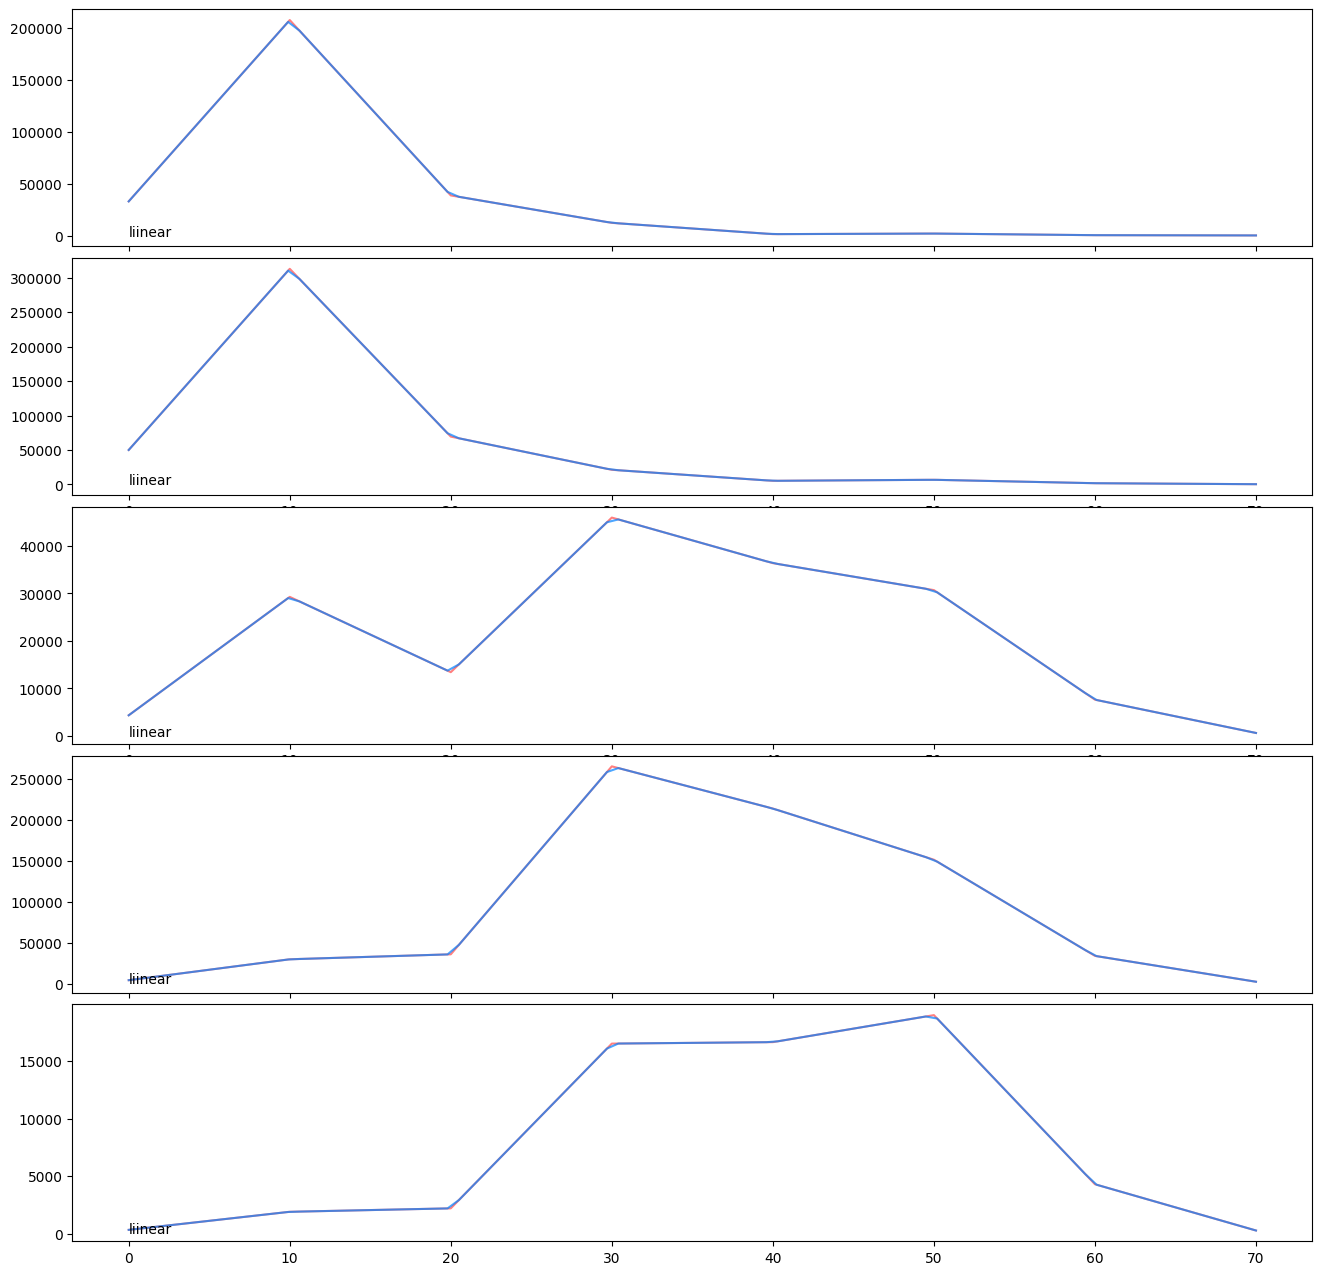

In [47]:
import matplotlib.pyplot as plt
keys = sorted(nonzeroint_for_smoothing)
print(len(keys))

n_plots = 5
fig, axes = plt.subplots(n_plots, 1)
fig.set_size_inches(16.0, 16.0)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
plot_keys = (5, 10, 15, 20, 25)
plot_keys = (keys[i] for i in plot_keys)

from scipy.interpolate import interp1d

for row, key in enumerate(plot_keys):
    axes[row].plot(nonzerov_for_smoothing[key], nonzeroint_for_smoothing[key], color='#FF0000', alpha=0.5)
    X = np.array(nonzerov_for_smoothing[key])
    I = np.array(nonzeroint_for_smoothing[key])
    X_plot = np.linspace(0, 70, 100)[:, np.newaxis]
    interp_func = interp1d(X, I, kind='linear', fill_value="extrapolate")
    I_plot = interp_func(X_plot)
    axes[row].plot(X_plot, I_plot, color='#0080FF', alpha=0.7)
    axes[row].text(0, 0.31, "liinear")    
    """
    X = np.array(nonzerov_for_smoothing[key])[:, None]
    I = np.array(nonzeroint_for_smoothing[key])
    print(X.shape)
    X_plot = np.linspace(-10, 80, 256)[:, np.newaxis]
    kde = KernelDensity(kernel="gaussian", bandwidth=4.).fit(X, sample_weight=I)
    log_dens = kde.score_samples(X_plot)
    recon_dens = np.exp(log_dens)
    recon_dens *= np.percentile(I, 99.5) / np.percentile(recon_dens, 99.5) 
    axes[row].plot(X_plot[:, 0], recon_dens, color='#0080FF', alpha=0.7)
    axes[row].text(-3.5, 0.31, "Gaussian Kernel Density")
    """
plt.show()

##next step, take interpolated data from both linear and quadratic fits and pass this into pomegranate. 


In [48]:
arrtimes = sorted(nonzerov_for_smoothing) #sorted gets keys
arrtimes_all = sorted(set([x for x in int_for_smoothing]))
print(arrtimes_all)
print(len(arrtimes_all))

[54.982, 55.228, 55.474, 55.72, 55.966, 56.212, 56.458, 56.704, 56.95, 57.196, 57.442, 57.688, 57.934, 58.18, 58.426, 58.672, 58.918, 59.164, 59.41, 59.656, 59.902, 60.148, 60.394, 60.64, 60.886, 61.132, 61.378, 61.624, 61.87, 62.116, 62.362, 62.608, 62.854, 63.1, 63.346, 63.592, 63.838, 64.084, 64.33, 64.576, 64.822, 65.068, 65.314, 65.56, 65.806, 66.052, 66.298, 66.544, 66.79, 67.036, 67.282, 67.528, 67.774, 68.02, 68.266, 68.512, 68.758, 69.004, 69.25, 69.496, 69.742, 69.988, 70.234, 70.48, 70.726, 70.972, 71.218, 71.464, 71.71, 71.956, 72.202, 72.448, 72.694, 72.94, 73.186, 73.432, 73.678, 73.924, 74.17, 74.416, 74.662, 74.908, 75.154, 75.4, 75.646, 75.892, 76.138, 76.384, 76.63, 76.876, 77.122, 77.368, 77.614, 77.86, 78.106, 78.352, 78.598, 78.844, 79.09, 79.336, 79.582, 79.828, 80.074, 80.32, 80.566, 80.812, 81.058, 81.304, 81.55, 81.796, 82.042, 82.288, 82.534, 82.78, 83.026, 83.272, 83.518, 83.764, 84.01, 84.256, 84.502, 84.748, 84.994, 85.24, 85.486, 85.732, 85.978, 86.224, 86

(54.982, 103.936) (0, 70)


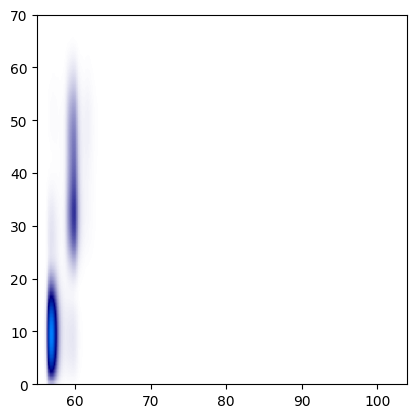

In [105]:
#print(arrtimes)
interpolated_data = np.zeros((len(arrtimes_all), 100))
for i, arrtime in enumerate(arrtimes):
    X = np.array(nonzerov_for_smoothing[arrtime])
    I = np.array(nonzeroint_for_smoothing[arrtime])
    X_new = np.linspace(0, 70, 100)[:, np.newaxis] #try to put 0 to 80 in 256 steps as variables at some point
    interp_func = interp1d(X, I, kind='quadratic', fill_value="extrapolate") #interp1d is imported function from scipy
    I_new = interp_func(X_new) #have learnt smooth curve via function, now getting 256 values along smooth curve
    interpolated_data[i] = I_new[:,0]

interpolated_data = np.clip(interpolated_data, a_min = 0, a_max = None)
#interpolated_data -= interpolated_data.min()

from matplotlib.colors import LinearSegmentedColormap
n_contours = 16
density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF','#000080','#0080FF'], N=256)
contour_colormap = LinearSegmentedColormap.from_list(name='contour', colors=['#B0B0B0','#0080FF'], N=n_contours) 

fig, ax = plt.subplots()
x_range = (arrtimes_all[0], arrtimes_all[-1]) #min and max, effectively, cos it's sorted
y_range = (0, 70)
print(x_range, y_range)
aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])
ax.imshow(interpolated_data.T, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect)
plt.show()

In [106]:
Volts_new = np.linspace(0, 70, 100)
A = interpolated_data
n,m = A.shape #that's  as n=non-0 arrT's and m=interpolated voltages. 
print(n,m)

x_arrT_coords = []
y_smoothV_coords = []
intensity_vals = []

for i in range(n):
    for j in range(m):
        intensity_value = int(A[i,j])
        x_arrT_coords.append(arrtimes_all[i])
#print(x_arrT_coords)        
        y_smoothV_coords.append(Volts_new[j])
        intensity_vals.append(intensity_value)
print(len(x_arrT_coords)) #15872 i.e. 62*256
print(len(y_smoothV_coords)) #15872
print(len(intensity_vals)) #15872

coordinates = list(zip(x_arrT_coords, y_smoothV_coords))
print(len(coordinates)) #15782
print(intensity_vals[0:101])

coordinates = np.array(coordinates)
intensity_vals = np.array(intensity_vals)

200 100
20000
20000
20000
20000
[14, 12, 11, 10, 9, 7, 6, 5, 4, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 6, 8, 10, 13, 15, 18, 20, 21, 22, 23, 23, 23, 23, 22, 21, 19, 17, 15, 12, 10, 7, 5, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(10.04955169098597, 39.12783153286334, 36.22310938155409)
(9.674037258748177, 42.572610080896396, 27.38689711688624, 36.43046907000652)
(27.398442408747297, 44.51955883440122, 34.07679205773804, 9.674050900599626, 36.56818733146618)


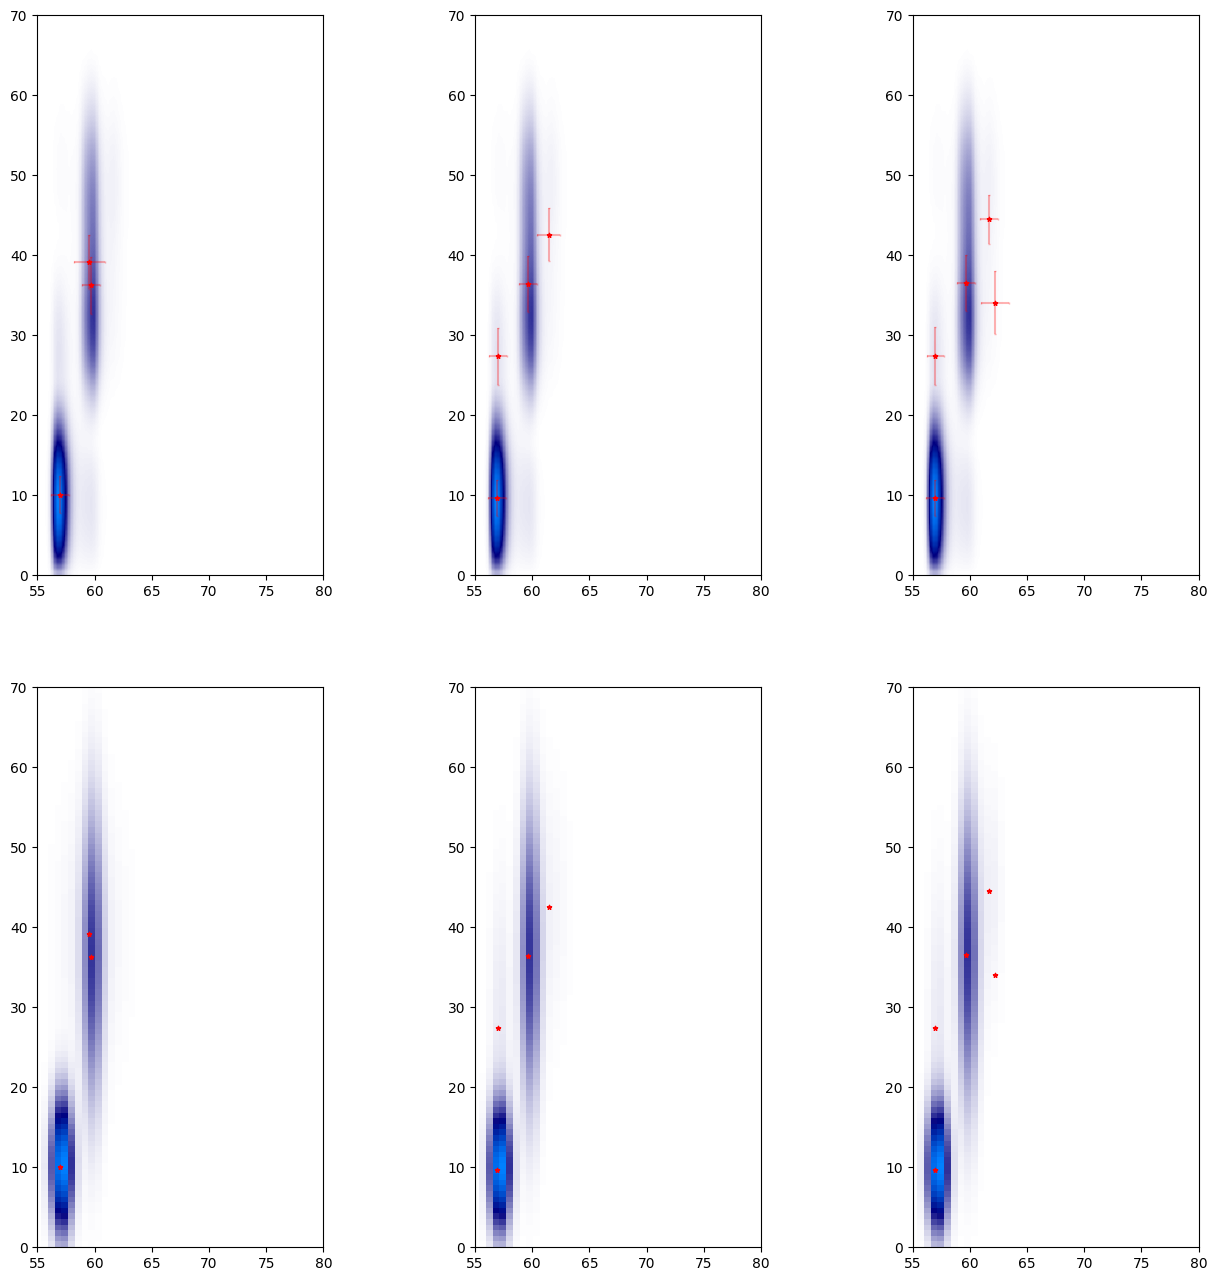

In [113]:
import pomegranate
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] =  0.6 #0.1 #0.8 #1 #2#0.6
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 5 #8 #1 #5#11 ##stick w 10
        NormalDistribution.__init__(self, *args, **kw)

test_n_components = [3,4,5]

fig1, axarr = plt.subplots(2, len(test_n_components), squeeze=False)
fig1.set_size_inches(16,16)


gmmlist = []
for i, n_comp in enumerate(test_n_components):
 
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, coordinates, intensity_vals, n_init = 5, max_kmeans_iterations = 30)
    gmmlist.append(gmm)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(coordinates) * intensity_vals).sum() #sum, as in log space, normally porbs would multiply. 
    bic = float(df * np.log(len(coordinates)) - 2.0 * lp) # For evaluating best n_comp
    
    # For independent x,y normals
    comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
    x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
    y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    
  # Sqrt for Var to Std
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    print(y_vals_mean)

    ax1 = axarr[0,i] #
    ax1.set_xlim(55, 80)
    ax1.set_ylim(y_range)
    aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])
    ax1.imshow(interpolated_data.T, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect) 
    ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    ax1.errorbar(x_vals_mean, y_vals_mean, y_vals_std, x_vals_std, fmt='none',
               color='red',alpha=0.3,  label='StdDevs', capsize=0.5)


    xgap = (max(arrtimes_all) - min(arrtimes_all))/10 
    x_grange = (min(arrtimes_all)-xgap, max(arrtimes_all)+xgap) 
    n_grid = 100
    x_points = np.linspace(x_grange[0], x_grange[1], n_grid) 
    y_points = np.linspace(0, 70, 100)
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of coordinates
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([n_grid, n_grid]) # Restore points grid (of heights)

    ax2 = axarr[1,i]
    ax2.set_xlim(55, 80)
    ax2.set_ylim(y_range)
    aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])
    ax2.imshow(density_2d, cmap=density_colormap, origin='lower', extent=x_grange + y_range, aspect=aspect) 
    ax2.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')

  
plt.show() 

In [98]:
#print(gmmlist)

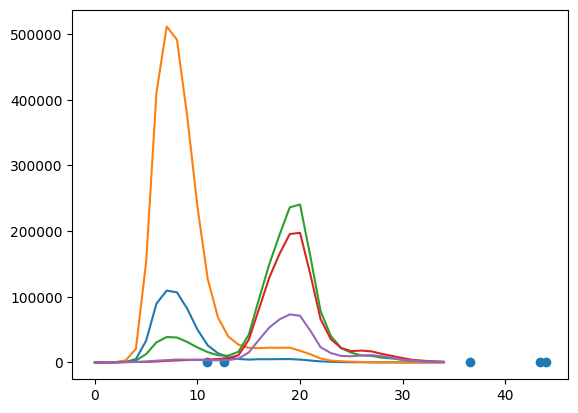

In [89]:
fig, ax = plt.subplots()

for i in range(0, 100, 20):
  ax.plot(interpolated_data.T[i][:35])



plt.show()

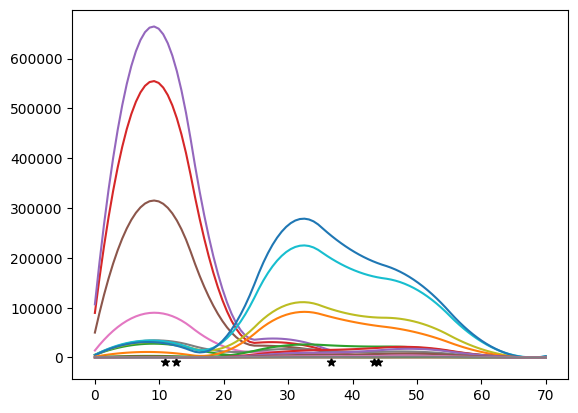

In [95]:
fig, ax = plt.subplots()

for i in range(0, 35, 2):
  ax.plot(X_plot, interpolated_data.T[:,i])

ax.scatter(y_vals_mean, [-10000] * len(y_vals_mean), marker='*', c='k')
plt.show()

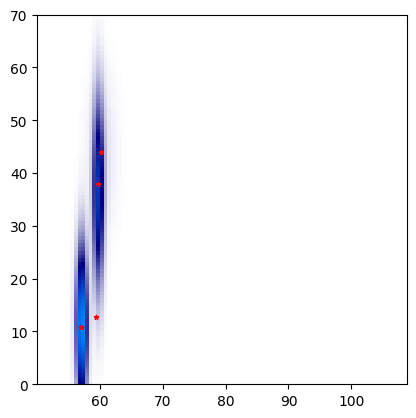

In [101]:


xgap = (max(arrtimes_all) - min(arrtimes_all))/10 
x_range = (min(arrtimes_all)-xgap, max(arrtimes_all)+xgap) #set on min plus a bit and vv for volatges and arrtimes. 

n_grid = 100
x_points = np.linspace(x_range[0], x_range[1], n_grid) # sampling whole mesh for evaluation 
y_points = np.linspace(0, 70, 100)#np.linspace(y_range[0], y_range[1], n_grid)
    
x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of coordinates
x_grid_flat = x_grid.ravel()  # Flatten to list
y_grid_flat = y_grid.ravel() 
stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs
  
density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
density = np.exp(density) # Real probs
density_2d = density.reshape([n_grid, n_grid]) # Restore points grid (of heights)

fig, ax = plt.subplots()
ax.set_xlim(x_range)
ax.set_ylim(y_range)
aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])
ax.imshow(density_2d, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect) 
ax.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
